In [5]:
import pandas as pd
import numpy as np
!pip install 'plotnine[all]'
from plotnine import *
import matplotlib.pyplot as plt

In [0]:
# Creating a dataframe for each file
# The dataset from Kaggle:
with open('Tweets.csv') as csvfile:
    tweets = pd.read_csv(csvfile, encoding='ISO-8859-1')

# The datasets from Yahoo Finance:
with open('AAL.csv') as csvfile:
    AAL = pd.read_csv(csvfile)

with open('DAL.csv') as csvfile:
    DAL = pd.read_csv(csvfile)

with open('LUV.csv') as csvfile:
    LUV = pd.read_csv(csvfile)

with open('UAL.csv') as csvfile:
    UAL = pd.read_csv(csvfile)

In [7]:
# Verifying all the dataframes have the same shape#
print(UAL.shape == AAL.shape == LUV.shape == DAL.shape)
print(tweets.shape)

True
(14640, 15)


In [8]:
# Column values
# print(list(tweets.columns.values))

# Data types
print(tweets.dtypes)

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object


In [9]:
# Drop the columns we don't use
tweets = tweets.drop(columns=['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'user_timezone'])

# Statistical summary of the DataFrame, with quartiles, median, etc.
print(tweets[['airline_sentiment_confidence', 'negativereason_confidence']].describe())



       airline_sentiment_confidence  negativereason_confidence
count                  14640.000000               10522.000000
mean                       0.900169                   0.638298
std                        0.162830                   0.330440
min                        0.335000                   0.000000
25%                        0.692300                   0.360600
50%                        1.000000                   0.670600
75%                        1.000000                   1.000000
max                        1.000000                   1.000000


In [0]:
# Data cleaning
# https://medium.com/@gscheithauer/data-visualization-in-python-like-in-rs-ggplot2-bc62f8debbf5



/usr/local/lib/python3.6/dist-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


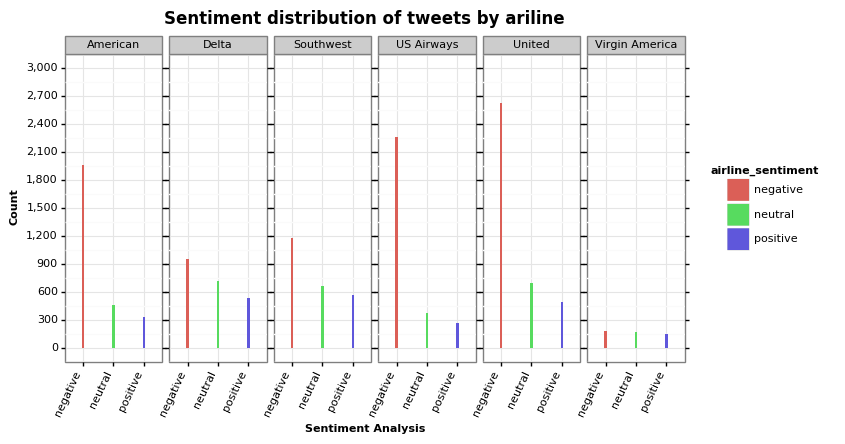

<ggplot: (8764112274808)>


In [12]:
## Sentiment Analysis by Airline v.0

def labels(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).apply(lambda x: '{:,}'.format(x)).tolist()
def breaks(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).tolist()

fig = (
    ggplot(tweets) +
    geom_histogram(aes(x = 'airline_sentiment', fill = "airline_sentiment")) + 
    labs(title ='Sentiment distribution of tweets by ariline', x = 'Sentiment Analysis', y = 'Count') +
    #scale_x_discrete(labels = labels("negative", "neutral", "positive"))+
    scale_y_continuous(limits = (0, 3000), labels = labels(0, 3000, 300), breaks = breaks(0, 3000, 300)) +
    facet_wrap('~airline', ncol = 6) +
    theme_set(theme_classic()) +
    theme(figure_size = (8, 4), 
          text = element_text(size = 8, color = 'black', family = 'Arial'),
          plot_title = element_text(color = 'black',family = 'Arial',weight = 'bold',size = 12),
          axis_title = element_text(color = 'black',family = 'Arial',weight = 'bold',size = 8),
          axis_text_x = element_text(angle=65, hjust=1),
          legend_title_align='center', legend_title=element_text(weight='bold'))
    )

print(fig)

NameError: ignored

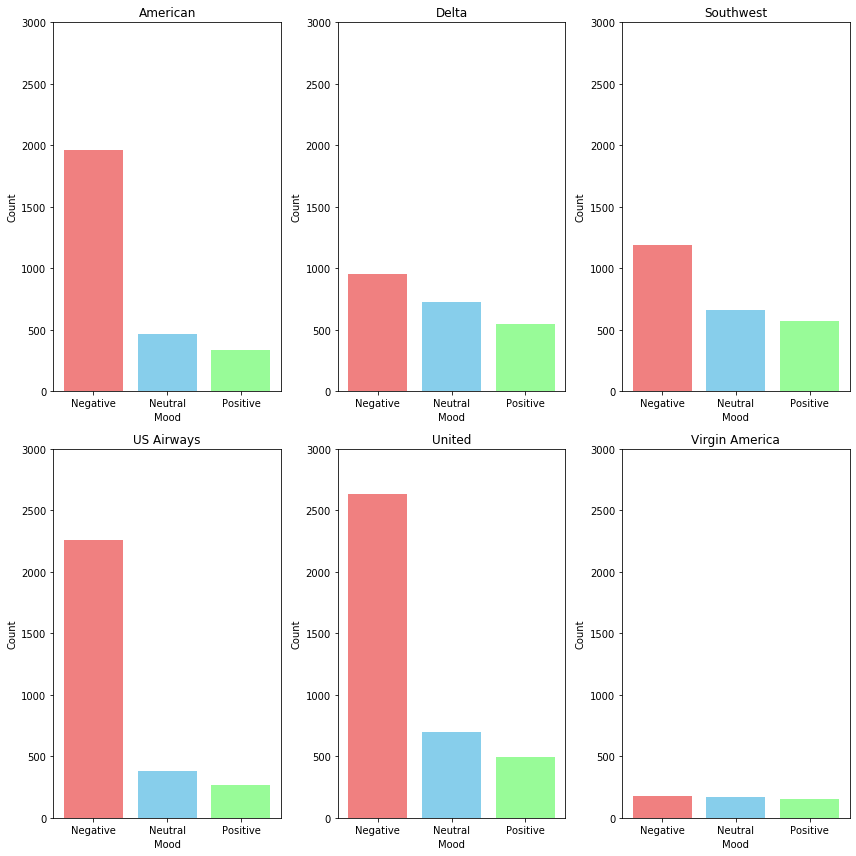

In [14]:
## Sentiment Analysis by Airline v.1

def sentiment_by_airline(Airline):
  df=tweets[tweets['airline']==Airline]
  count=df['airline_sentiment'].value_counts()
  Index = [1,2,3]
  plt.bar(Index,count,color=['lightcoral', 'skyblue', 'palegreen'])
  plt.xticks(Index,['Negative','Neutral','Positive'])
  plt.ylabel('Count')
  plt.xlabel('Mood')
  plt.title(Airline)
  plt.ylim(0,3000)

airlines = ["American", "Delta", "Southwest", "US Airways", "United", "Virgin America"]
plt.figure(1,figsize=(12, 12))


for airline in airlines:
  plt.subplot(231 + airlines.index(airline))
  sentiment_by_airline(airline)
plt.tight_layout()

count=df['airline_sentiment'].value_counts()
print("The most common class is negative mood =", count[0]/sum(count[0:3]))


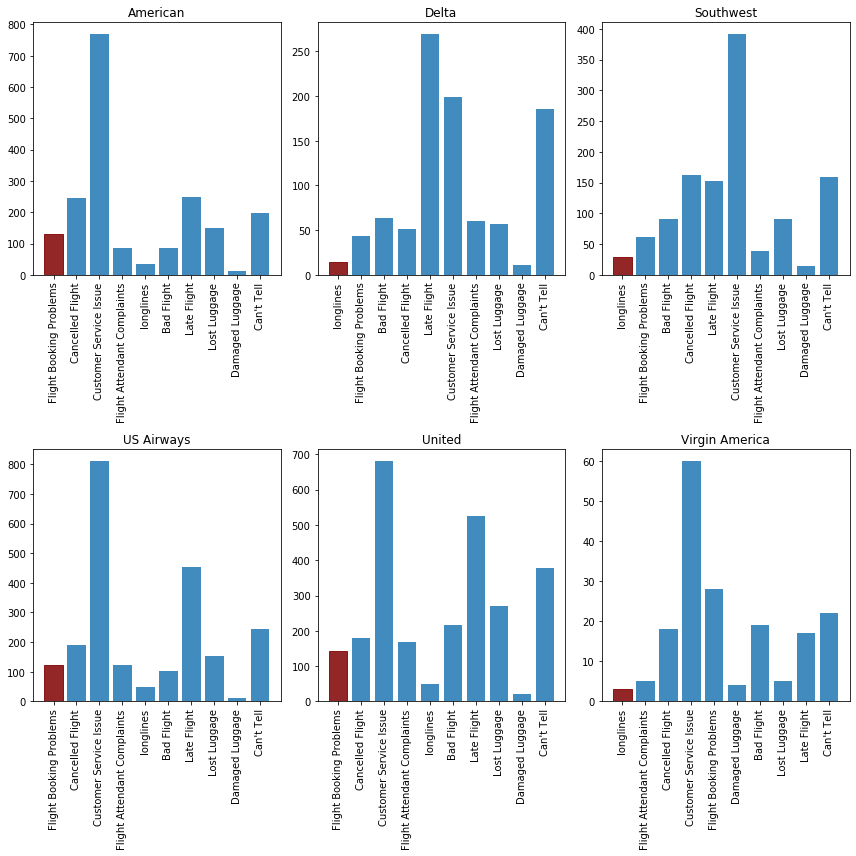

In [18]:
## Negative Reason by Airline
cmap = ['maroon', 'darkred', 'brown', 'indianred', 'darksalmon', 'salmon', 'lightsalmon', 'peachpuff', 'lavenderblush', 'lightyellow']
def negative_reason(Airline):
  df=tweets[tweets['airline']== Airline]
  Neg_reasons_values = df['negativereason'].value_counts(sort=False)
  Neg_reasons_labels = dict(df['negativereason'].value_counts(sort=False))
  Index = range(len(Neg_reasons_values))
  # color = plt.get_cmap('Reds')
  barplot = plt.bar(Index,Neg_reasons_values, alpha = 0.85)
  
  plt.xticks(Index,Neg_reasons_labels, rotation = 90)
  plt.title(Airline)

  for color in cmap:
  # barplot[cmap.index(color)].set_color(color)
   barplot[0].set_color('maroon')
  # ax = plt.gca()
  # ax.invert_yaxis()

airlines = ["American", "Delta", "Southwest", "US Airways", "United", "Virgin America"]
plt.figure(1,figsize=(12, 12))

for airline in airlines:
  plt.subplot(231 + airlines.index(airline))
  negative_reason(airline)
plt.tight_layout()



In [0]:
# df = tweets[['text', 'airline_sentiment']]


The most common class is negative mood = 0.6269125683060109
